In [12]:
import numpy as np #para manipular os vetores
from matplotlib import pyplot as plt #para plotar os gráficos
from sklearn.cluster import KMeans #para usar o KMeans
from imagem import Imagem
from skimage.filters.rank import mean
from skimage.filters.thresholding import threshold_otsu
from glob import glob
from skimage.io import imsave
from otsu_niblack import otsu, niblack
from sklearn.metrics import accuracy_score, cohen_kappa_score, roc_auc_score
#from ..Atividade03.imagem import Imagem

In [13]:
aux = glob('./ultrassound/cropped/*', recursive=True)

In [14]:
aux

['./ultrassound/cropped/1100212031.bmp',
 './ultrassound/cropped/1100212021.bmp',
 './ultrassound/cropped/1903711023.bmp',
 './ultrassound/cropped/1903711047.bmp',
 './ultrassound/cropped/1912211030.bmp',
 './ultrassound/cropped/1806011012.bmp',
 './ultrassound/cropped/1903711046.bmp',
 './ultrassound/cropped/1905012031.bmp',
 './ultrassound/cropped/1901208029.bmp',
 './ultrassound/cropped/1100911010.bmp',
 './ultrassound/cropped/1812710102.bmp',
 './ultrassound/cropped/1903310005.bmp',
 './ultrassound/cropped/1903709109.bmp',
 './ultrassound/cropped/1903710040.bmp',
 './ultrassound/cropped/1903310028.bmp',
 './ultrassound/cropped/1903304027.bmp',
 './ultrassound/cropped/1100911003.bmp',
 './ultrassound/cropped/1901206006.bmp',
 './ultrassound/cropped/1903705007.bmp',
 './ultrassound/cropped/1105110003.bmp',
 './ultrassound/cropped/1903711052.bmp',
 './ultrassound/cropped/1903311009.bmp',
 './ultrassound/cropped/1901211013.bmp',
 './ultrassound/cropped/1100208028.bmp',
 './ultrassound/

In [15]:
def aplica_kmeans(imagens):
    for i in imagens:
        img = Imagem(i)
        img.ler()
        img_media = mean(img.dimensoes[0], np.ones((10,10)))
        kmeans = KMeans(n_clusters = 2)
        trimg = np.reshape(img_media, (-1,1))
        kmeans.fit(trimg)
        result = (kmeans.labels_.reshape(img_media.shape))
        local = i
        new = './results/kmeans/' + local.replace("./ultrassound/cropped/","")
        imsave(new,result)

In [16]:
def aplica_otsu_niblack(imagens):
    for i in imagens:
        img = Imagem(i)
        img.ler()
        o = otsu(img.dimensoes[0])
        n = niblack(img.dimensoes[0], ws=25, k=0.8)
        local = i
        new1 = './ultrassound/otsu/'
        new2 = './ultrassound/niblack/'
        plt.imsave(new1,o,cmap='gray')
        plt.imsave(new2,n,cmap='gray')


In [17]:
aplica_kmeans(aux)

/tmp/ipykernel_9268/3937909624.py:12: UserWarning: ./results/kmeans/1100212031.bmp is a low contrast image
  imsave(new,result)
Lossy conversion from int32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/tmp/ipykernel_9268/3937909624.py:12: UserWarning: ./results/kmeans/1100212021.bmp is a low contrast image
  imsave(new,result)
Lossy conversion from int32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/tmp/ipykernel_9268/3937909624.py:12: UserWarning: ./results/kmeans/1903711023.bmp is a low contrast image
  imsave(new,result)
Lossy conversion from int32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/tmp/ipykernel_9268/3937909624.py:12: UserWarning: ./results/kmeans/1903711047.bmp is a low contrast image
  imsave(new,result)
Lossy conversion from int32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/tmp/ipykernel_9268/

Fontes:
- https://medium.com/programadores-ajudando-programadores/k-means-o-que-%C3%A9-como-funciona-aplica%C3%A7%C3%B5es-e-exemplo-em-python-6021df6e2572

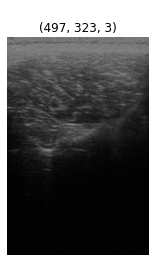

In [18]:
img = Imagem('ultrassound/cropped/503311001.bmp')
img.ler()
img.show()

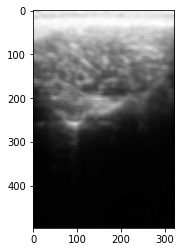

In [19]:
img_media = mean(img.dimensoes[0], np.ones((10,10)))
plt.imshow(img_media, cmap='gray')

In [20]:
kmeans = KMeans(n_clusters = 3)

In [21]:
b = np.reshape(img_media, (-1,1))
kmeans.fit(b)

KMeans(n_clusters=3)

In [22]:
result = (kmeans.labels_.reshape(img_media.shape))

In [23]:
img.dimensoes[0].shape

(497, 323)

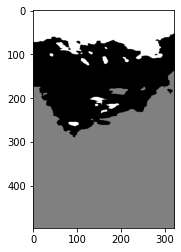

In [24]:
plt.imshow(result, cmap='gray')

In [25]:
def mostra(result, n=3):
    for i in range(n):
        r = result == i
        plt.imshow(r, cmap='gray')
        plt.show()

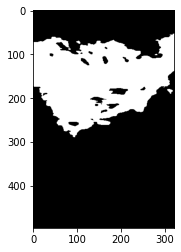

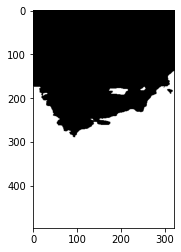

In [26]:
mostra(result, 2)

In [43]:
def metricas(imagens,masks,nome):
    Accuracy = 0
    CohensKappa = 0
    ROC = 0
    for i in range(len(imagens)):
        img_ori = Imagem(imagens[i])
        img_mod = Imagem(masks[i])
        img_ori.ler()
        img_mod.ler()
        img1 = np.array(img_ori.dimensoes[0]).ravel()
        img2 = np.array(img_mod.dimensoes[0]).ravel()
        acc = accuracy_score(img1,img2)
        coh = cohen_kappa_score(img1,img2)
        roc = roc_auc_score(img1,img2,average='micro')
        Accuracy += acc
        CohensKappa += coh
        ROC += roc
    #print(Accuracy/len(imagens))
    #print(CohensKappa/len(imagens))
    #print(ROC/len(imagens))

    return {
        'acuracia':Accuracy/len(imagens),
        'kappa':CohensKappa/len(imagens),
        'roc':ROC/len(imagens)
    }     

In [44]:
masks = glob('./ultrassound/masks/*', recursive=True)
kmeans_img = glob('./results/kmeans/*', recursive=True)

In [45]:
resultados = metricas(masks,kmeans_img,'KMeans')

In [46]:
resultados

{'acuracia': 0.5943185640035772,
 'kappa': 0.2106832109348866,
 'roc': 0.5934376345787201}